# 이수안컴퓨터연구소 머신러닝 #7
## Support Vector Machines => 회귀, 분류, 이상치 탐지 등에 사용

SVM을 이용한 회귀 모델과 분류 모델\
SVM을 사용한 회귀(SVR)\
SVM을 사용한 분류 모델(SVC)\
 * 커널 기법
 * 매개변수 튜닝
 * 데이터 전처리

Linear SVR
 * 보스턴 주택 가격
 * 당뇨병

Kernel SVR
 * 보스턴 주택 가격
 * 당뇨병

Linear SVC
 * 유방암
 * iris
 * wine

Kernel SVC
 * 유방암
 * iris
 * wine

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn import set_config
set_config(display='text')

## SVM을 이용한 회귀 모델과 분류 모델
### SVM을 사용한 회귀(SVR)

In [4]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.22676000698051946
test data score  : 0.10276725750205074


### SVM을 사용한 분류 모델(SVC)

In [5]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.9032967032967033
test data score  : 0.9298245614035088


커널 기법
* 입력 데이터를 고차원 공간에 사상(mapping)해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* sklearn 에서 제공하는 Linear, Polynomial, RBF(Radial Basis Function)=방사형 기저 함수

In [6]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# kernel = linear
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print(f'Linear SVR train data score : {linear_svr.score(X_train, y_train)}')
print(f'Linear SVR test data score  : {linear_svr.score(X_test, y_test)}', '\n')

# kernel = poly
polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print(f'Polynomial SVR train data score : {polynomial_svr.score(X_train, y_train)}')
print(f'Polynomial SVR test data score  : {polynomial_svr.score(X_test, y_test)}', '\n')

# kernel = rbf
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print(f'Rbf SVR train data score : {rbf_svr.score(X_train, y_train)}')
print(f'Rbf SVR test data score  : {rbf_svr.score(X_test, y_test)}', '\n')

Linear SVR train data score : 0.7230811451471106
Linear SVR test data score  : 0.6053820109416316 

Polynomial SVR train data score : 0.21361422307243605
Polynomial SVR test data score  : 0.11429757352286751 

Rbf SVR train data score : 0.22676000698051946
Rbf SVR test data score  : 0.10276725750205074 



In [7]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# kernel = linear
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print(f'Linear SVC train data score : {linear_svc.score(X_train, y_train)}')
print(f'Linear SVC test data score  : {linear_svc.score(X_test, y_test)}', '\n')

# kernel = poly
polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print(f'Polynomial SVC train data score : {polynomial_svc.score(X_train, y_train)}')
print(f'Polynomial SVC test data score  : {polynomial_svc.score(X_test, y_test)}', '\n')

# kernel = rbf
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print(f'Rbf SVC train data score : {rbf_svc.score(X_train, y_train)}')
print(f'Rbf SVC test data score  : {rbf_svc.score(X_test, y_test)}', '\n')

Linear SVC train data score : 0.9626373626373627
Linear SVC test data score  : 0.9824561403508771 

Polynomial SVC train data score : 0.9010989010989011
Polynomial SVC test data score  : 0.9298245614035088 

Rbf SVC train data score : 0.9032967032967033
Rbf SVC test data score  : 0.9298245614035088 



매개변수 튜닝
* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능

In [8]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
# kernel = poly
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print(f'kernel=poly, degree={2}, C={0.1}, gamma={"auto"}')
print(f'Polynomial SVC train data score : {polynomial_svc.score(X_train, y_train)}')
print(f'Polynomial SVC test data score  : {polynomial_svc.score(X_test, y_test)}', '\n')

kernel=poly, degree=2, C=0.1, gamma=auto
Polynomial SVC train data score : 0.9846153846153847
Polynomial SVC test data score  : 0.9912280701754386 



In [10]:
# kernel = rbf
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print(f'kernel=poly, C={2}, gamma={"scale"}')
print(f'Rbf SVC train data score : {rbf_svc.score(X_train, y_train)}')
print(f'Rbf SVC test data score  : {rbf_svc.score(X_test, y_test)}', '\n')

kernel=poly, C=2, gamma=scale
Rbf SVC train data score : 0.9164835164835164
Rbf SVC test data score  : 0.9385964912280702 



데이터 전처리
* SVM은 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* StandardScaler or MInMaxScaler 사용해서 정규화

In [11]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
model = SVC()
model.fit(X_train, y_train)

print(f'SVC train data score : {model.score(X_train, y_train)}')
print(f'SVC test data score  : {model.score(X_test, y_test)}')

SVC train data score : 0.9032967032967033
SVC test data score  : 0.9298245614035088


In [13]:
# StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train, y_train)

print(f'SVC train data score : {model.score(X_train, y_train)}')
print(f'SVC test data score  : {model.score(X_test, y_test)}')

SVC train data score : 0.9868131868131869
SVC test data score  : 0.9824561403508771


In [14]:
# MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train, y_train)

print(f'SVC train data score : {model.score(X_train, y_train)}')
print(f'SVC test data score  : {model.score(X_test, y_test)}')

SVC train data score : 0.9802197802197802
SVC test data score  : 0.9824561403508771


## Linear SVR
### 보스턴 주택 가격

In [15]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.7024678353449922
test data score  : 0.7266417997035095


### 저차원 변환(TSNE) 후 시각화

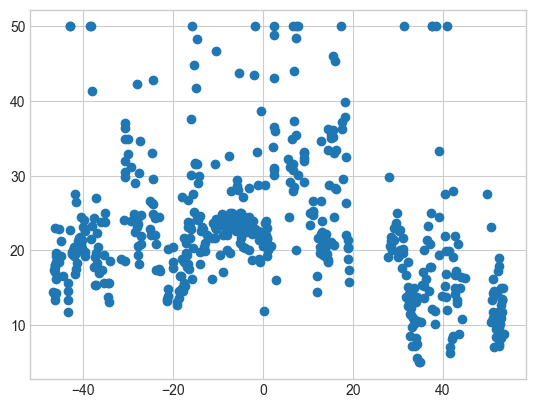

In [18]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

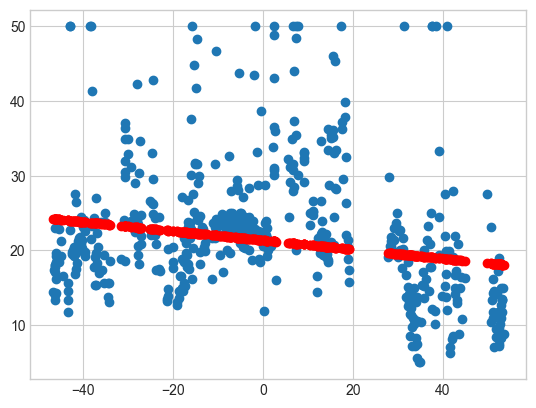

In [19]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [20]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.7s finished


{'fit_time': array([0.00952363, 0.00850677, 0.00852299, 0.00950861, 0.01002169]),
 'score_time': array([0.00100064, 0.00100088, 0.00100064, 0.        , 0.00050354]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [21]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [22]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 당뇨병

In [23]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.5035200078812228
test data score  : 0.4597028081474196


##### 저차원 변환(TSNE) 후 시각화

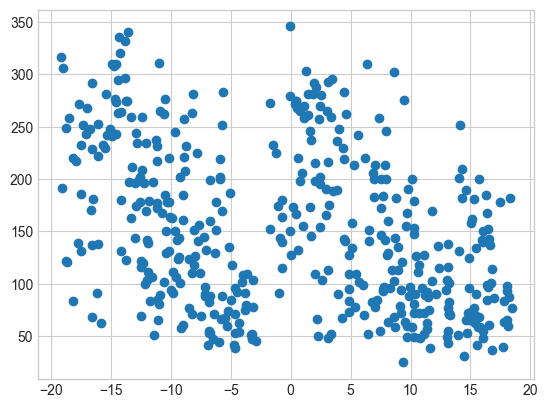

In [26]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

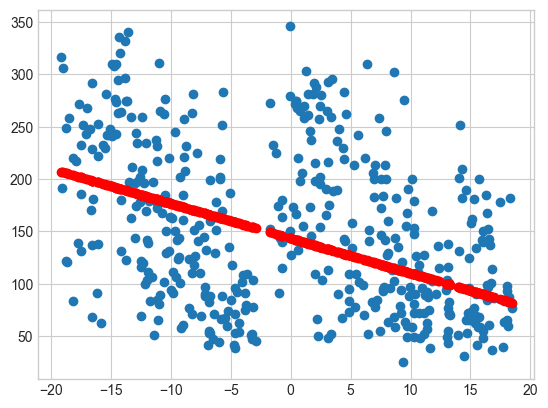

In [27]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [28]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00499964, 0.00399876, 0.00399876, 0.00399876, 0.00400114]),
 'score_time': array([0.00099993, 0.00100088, 0.00100088, 0.00100088, 0.00099993]),
 'test_score': array([0.43039087, 0.51655019, 0.48275821, 0.4224617 , 0.53077081])}

In [29]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [30]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR
### 보스턴 주택 가격

In [31]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.6824706765158317
test data score  : 0.5798991624732734


### 저차원 변환(TSNE) 후 시각화

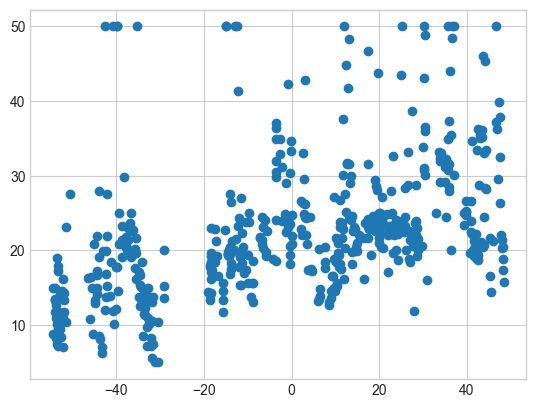

In [34]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

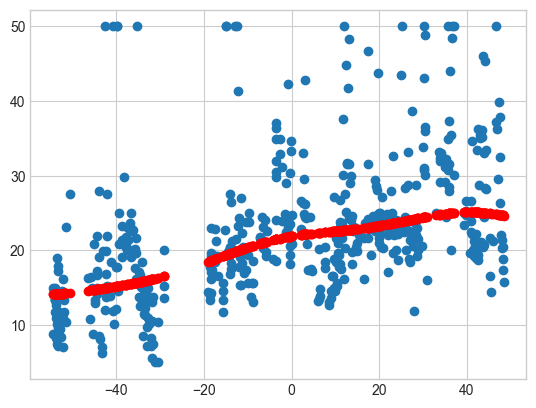

In [35]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [36]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00651979, 0.00652122, 0.00752115, 0.00652122, 0.00652122]),
 'score_time': array([0.00300074, 0.00200009, 0.00250363, 0.00350356, 0.00350356]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [37]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid'],}]
            #    'model__C': [1.0, 0.1, 0.01],
            #    'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=24,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [38]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', SVR())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVR(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__cache_size': 200,
 'model__coef0': 0.0,
 'model__degree': 3,
 'model__epsilon': 0.1,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [39]:
# best_estimator 의 kernel 이 rbf 로 나왔으므로 rfb는 두고
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

# gamma와 C만 건드려보기
param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [40]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVR(epsilon=0.01),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__cache_size': 200,
 'model__coef0': 0.0,
 'model__degree': 3,
 'model__epsilon': 0.01,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

### 당뇨병

In [41]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.16084976352637959
test data score  : 0.19301149054785194


##### 저차원 변환(TSNE) 후 시각화

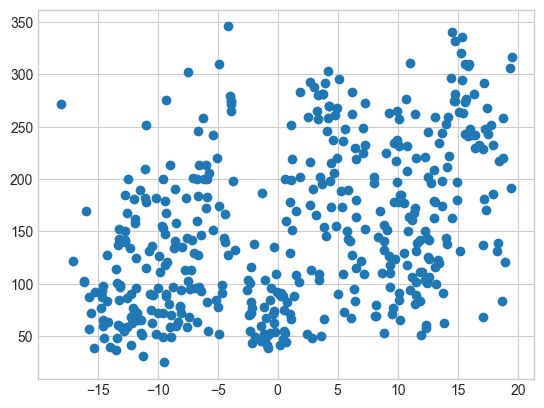

In [44]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

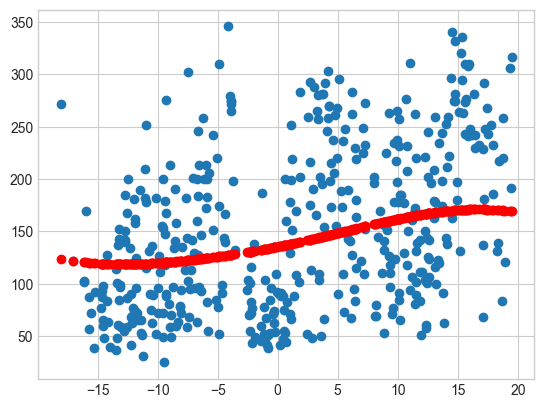

In [45]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [46]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00658178, 0.00457859, 0.00457954, 0.00457954, 0.00357914]),
 'score_time': array([0.00300145, 0.00300264, 0.00200081, 0.00300193, 0.00300193]),
 'test_score': array([0.14580768, 0.12539699, 0.18163843, 0.12222929, 0.15792104])}

In [47]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=24,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [48]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVR(kernel='sigmoid'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__cache_size': 200,
 'model__coef0': 0.0,
 'model__degree': 3,
 'model__epsilon': 0.1,
 'model__gamma': 'scale',
 'model__kernel': 'sigmoid',
 'model__max_iter': -1,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [49]:
# best_estimator 의 kernel 이 sifmoid 로 나왔다.
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='sigmoid'))])

# gamma와 C만 건드려보기
param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [50]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', SVR(epsilon=1.0, kernel='sigmoid'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVR(epsilon=1.0, kernel='sigmoid'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__cache_size': 200,
 'model__coef0': 0.0,
 'model__degree': 3,
 'model__epsilon': 1.0,
 'model__gamma': 'scale',
 'model__kernel': 'sigmoid',
 'model__max_iter': -1,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [51]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='sigmoid'))])

In [52]:
# sigmoid 로 fit 한 점수. 2배가량 올랐다.(그나마.. ^^)
print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.3516101823116575
test data score  : 0.4413529836317348


## Linear SVC
### 유방암

In [53]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.9912087912087912
test data score  : 0.9736842105263158


##### 시각화 코드 추가. (함수)

In [56]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
                         
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [57]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

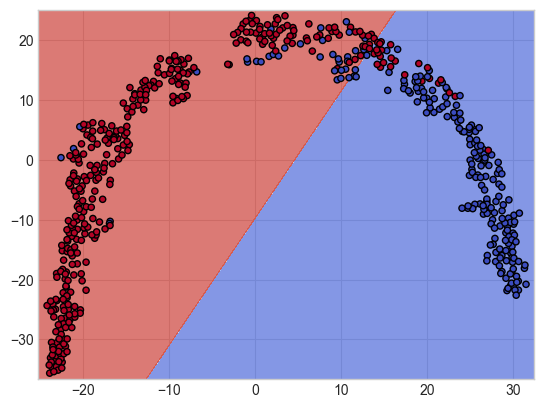

In [58]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [59]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00350547, 0.0025034 , 0.0025034 , 0.00150585, 0.00250745]),
 'score_time': array([0.       , 0.0010016, 0.0010016, 0.0010016, 0.       ]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [60]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [61]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', SVC(C=0.1, kernel='linear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVC(C=0.1, kernel='linear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 0.1,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'linear',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

### 붓꽃

In [62]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.975
test data score  : 0.9666666666666667


##### 시각화

In [65]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

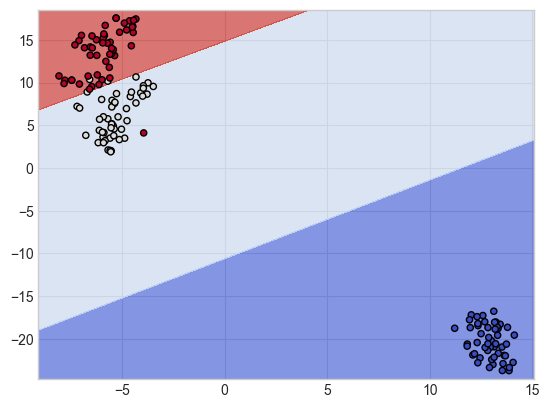

In [66]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [67]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099945, 0.00099945, 0.00100183, 0.00100183, 0.        ]),
 'score_time': array([0.        , 0.00100183, 0.        , 0.        , 0.00099897]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [68]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [69]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', SVC(kernel='linear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVC(kernel='linear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'linear',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

### wine

In [70]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 1.0
test data score  : 0.9722222222222222


##### 시각화

In [73]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

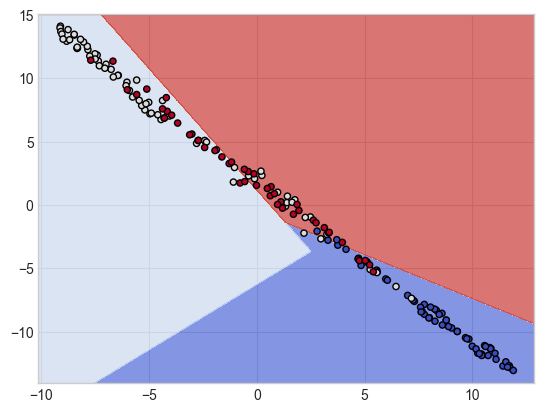

In [74]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [75]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00172138, 0.0010016 , 0.0010016 , 0.002002  , 0.00100112]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [76]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [77]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', SVC(C=0.1, kernel='linear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVC(C=0.1, kernel='linear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 0.1,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'linear',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

## Kernel SVC
### 유방암

In [78]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.989010989010989
test data score  : 0.9649122807017544


##### 시각화

In [81]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

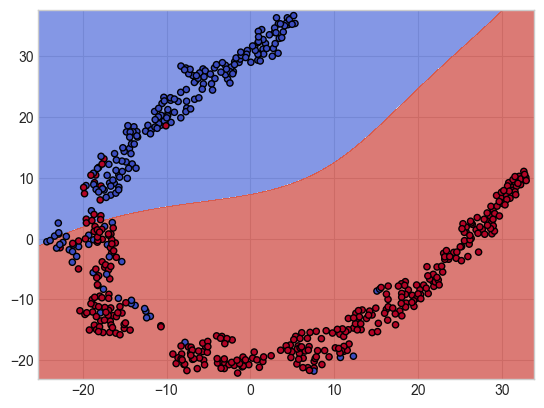

In [82]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [83]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00300169, 0.00199962, 0.00300074, 0.00300074, 0.00300074]),
 'score_time': array([0.00100112, 0.00200129, 0.00100017, 0.00100017, 0.00100017]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [84]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [85]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

### 붓꽃

In [86]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 1.0
test data score  : 0.8666666666666667


##### 시각화

In [89]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

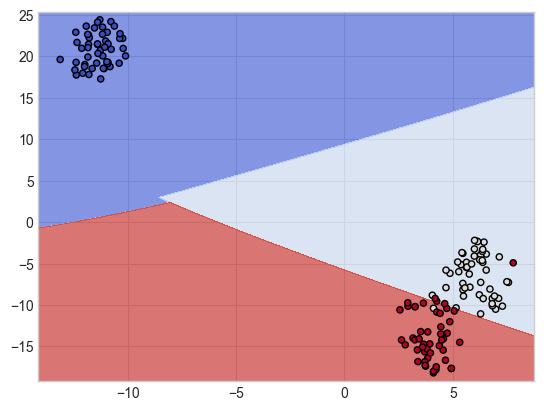

In [90]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [91]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00100064, 0.00100064, 0.00100064, 0.00100064, 0.00099945]),
 'score_time': array([0.        , 0.        , 0.00099945, 0.00099945, 0.        ]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [92]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [93]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

### wine

In [94]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 1.0
test data score  : 0.9444444444444444


##### 시각화

In [97]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

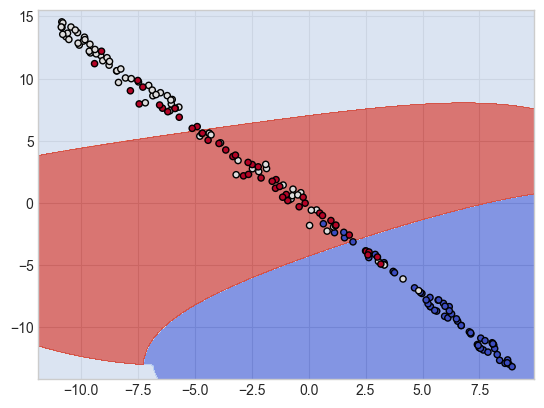

In [98]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [99]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(estimator,
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(), 
               verbose=True)

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0010004 , 0.0010004 , 0.00200105, 0.00100064, 0.00100064]),
 'score_time': array([0.        , 0.00100064, 0.        , 0.        , 0.00100017]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [100]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=24,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [101]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}